In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
from google.colab import files
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['googleplaystore.csv']))
print(df)

Saving googleplaystore.csv to googleplaystore (5).csv
                                                     App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10838                             Parkinson Exercices FR  ...          2.2 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope

In [ ]:
# df = pd.read_csv("googleplaystore.csv")

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head() # to display the first 5 data of the dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


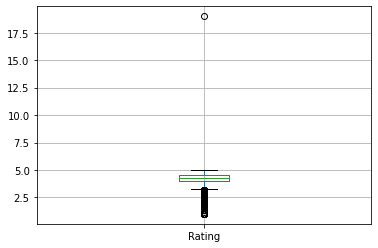

In [ ]:
df.boxplot() ## The dot tells us the outliers value 

In [ ]:
df.shape # tells the rows and columns in the dataset

(10841, 13)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69de2c7510>]],
      dtype=object)

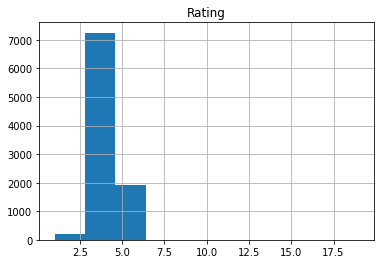

In [ ]:
df.hist() # to display the histogram

In [ ]:
df.describe() # from below we can also infer that rating is the only numeric value

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.info() # ratinf is the only float type here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum() # we can see that how many nulls values are there in each

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.drop([10472], inplace = True)

In [ ]:
df[10470:10475] # to see that 10472 has been deleted

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


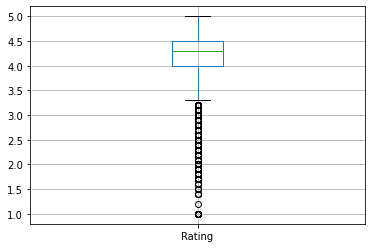

In [ ]:
df.boxplot()  # theb green line shows the average

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69de1638d0>]],
      dtype=object)

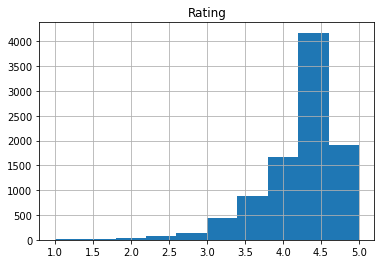

In [ ]:
df.hist()

In [ ]:
threshold =  len(df) * 0.1

In [ ]:
df.dropna(thresh= threshold, axis = 1, inplace = True)

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
def impute_median(series):
  return series.fillna(series.median)

In [ ]:
df.Rating = df['Rating'].transform(impute_median)

In [ ]:
df.isnull().sum() #we have replaced all null in Rating

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [ ]:
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace = True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace = True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace = True)

In [ ]:
df.isnull().sum() # NOW WE HAVE NO NULL VALUES

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df['Price'] = df['Price'].apply((lambda x: str(x).replace('$', '') if '$' in str(x) else str(x)))
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')

In [ ]:
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.describe() # price and installs have been converted into numeric values

,Reviews,Installs,Price
count,1.084000e+04,1.084000e+04,10840.000000
mean,4.441529e+05,1.546434e+07,1.027368
std,2.927761e+06,8.502936e+07,15.949703
min,0.000000e+00,0.000000e+00,0.000000
25%,3.800000e+01,1.000000e+03,0.000000
50%,2.094000e+03,1.000000e+05,0.000000
75%,5.477550e+04,5.000000e+06,0.000000
max,7.815831e+07,1.000000e+09,400.000000


In [ ]:
grp = df.groupby('Category')
x = grp['Installs'].agg(np.mean)
y = grp['Installs'].agg(np.sum)
z =grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

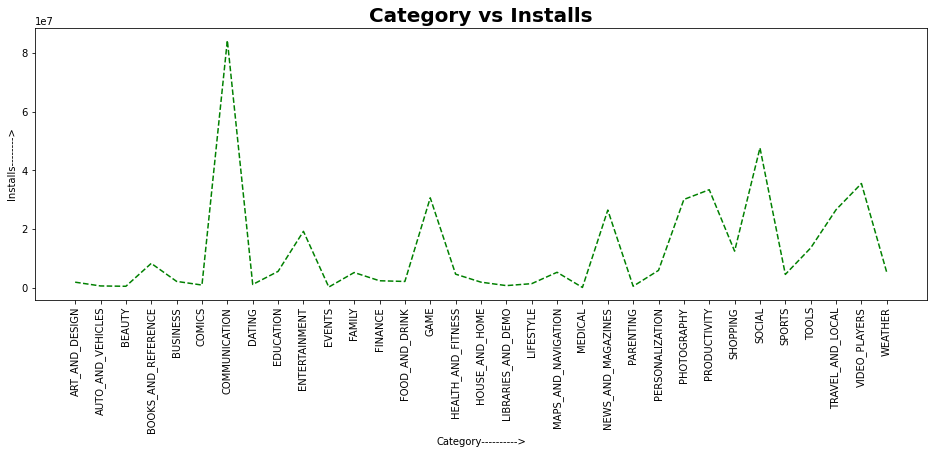

In [ ]:
plt.figure(figsize=(16,5))
import matplotlib.pyplot
matplotlib.pyplot
plt.plot(x, 'r--', color = 'g')
# sns.barplot(x=['category'], y=['review'])
plt.xticks(rotation = 90)
plt.title('Category vs Installs',fontweight="bold",fontsize=20)
plt.xlabel('Category---------->')
plt.ylabel('Installs-------->')
plt.show()

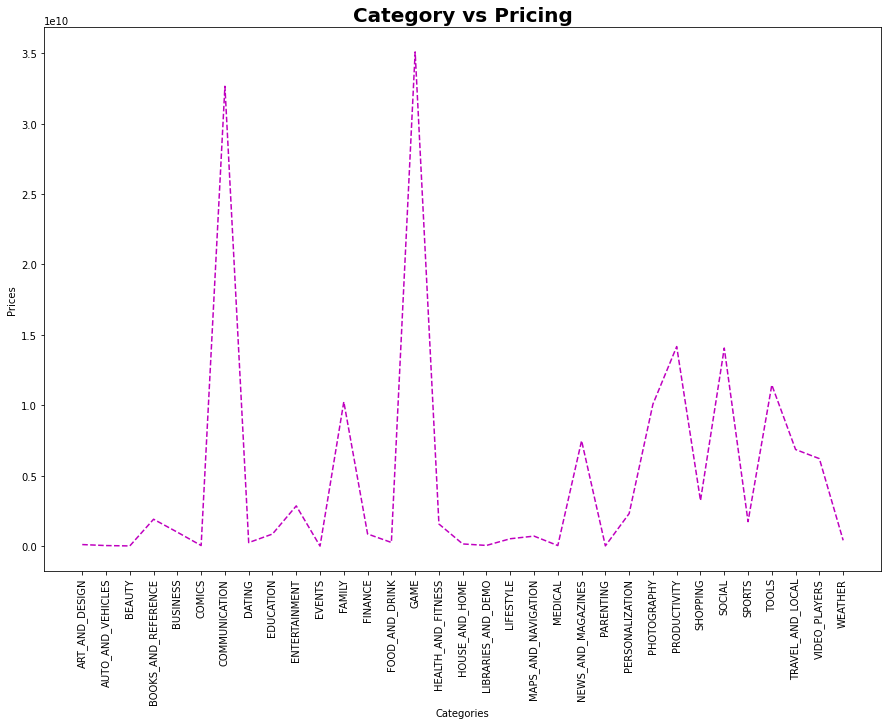

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y, 'r--', color = 'm')
plt.xticks(rotation = 90)
plt.title('Category vs Pricing',fontweight="bold",fontsize=20)
plt.xlabel('Categories')
plt.ylabel('Prices')
plt.show()

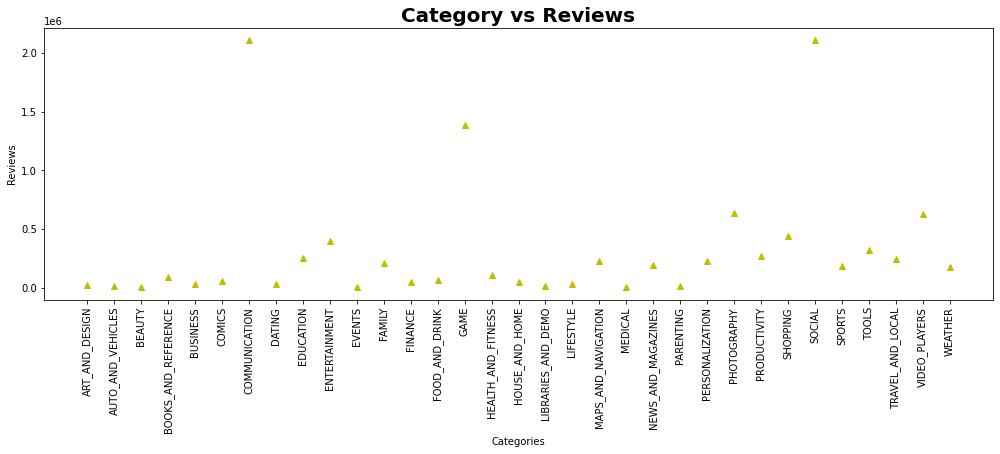

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(z, 'r^', color = 'y')
plt.xticks(rotation = 90)
plt.title('Category vs Reviews',fontweight="bold",fontsize=20)
plt.xlabel('Categories')
plt.ylabel('Reviews')
plt.show()